# Week 5 CSI – House Price Prediction Data Preprocessing and Feature Engineering

In [4]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# 2. Load dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.shape, test.shape)
train.head()

(1460, 81) (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# 3. Check missing values
missing = train.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [8]:
# 4. Handling missing values

# Define numeric and categorical columns
num_cols = train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = train.select_dtypes(include=['object']).columns

# Fill numeric missing with median
for col in num_cols:
    train[col].fillna(train[col].median(), inplace=True)

# Fill categorical missing with mode
for col in cat_cols:
    train[col].fillna(train[col].mode()[0], inplace=True)

# Verify missing values
train.isnull().sum().sum()

0

In [9]:
# 5. Feature Engineering

# Create new features
train['TotalBathrooms'] = (train['FullBath'] + (0.5 * train['HalfBath']) +
                           train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath']))

train['HouseAge'] = train['YrSold'] - train['YearBuilt']
train['RemodAge'] = train['YrSold'] - train['YearRemodAdd']
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']


In [10]:
# 6. Encode ordinal features manually if needed (example shown)
qual_mapping = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}

if 'ExterQual' in train.columns:
    train['ExterQual'] = train['ExterQual'].map(qual_mapping)


In [11]:
# 7. One-Hot Encode remaining categorical variables
train = pd.get_dummies(train, drop_first=True)

C:\Users\nishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


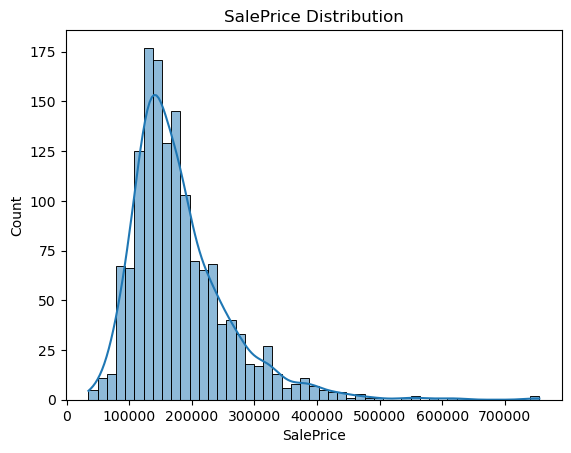

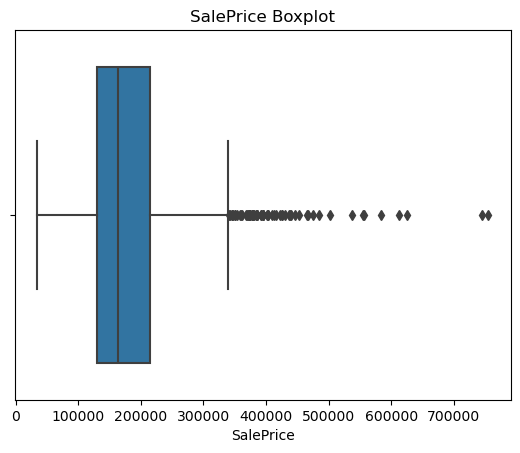

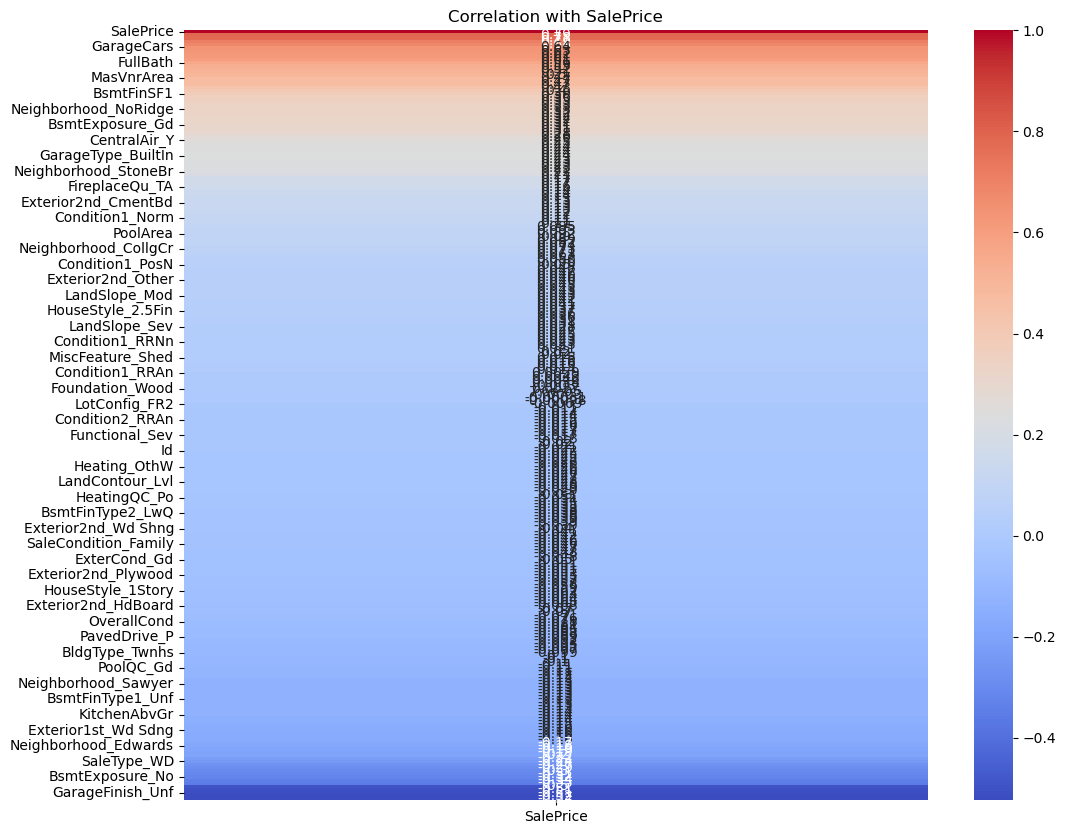

C:\Users\nishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

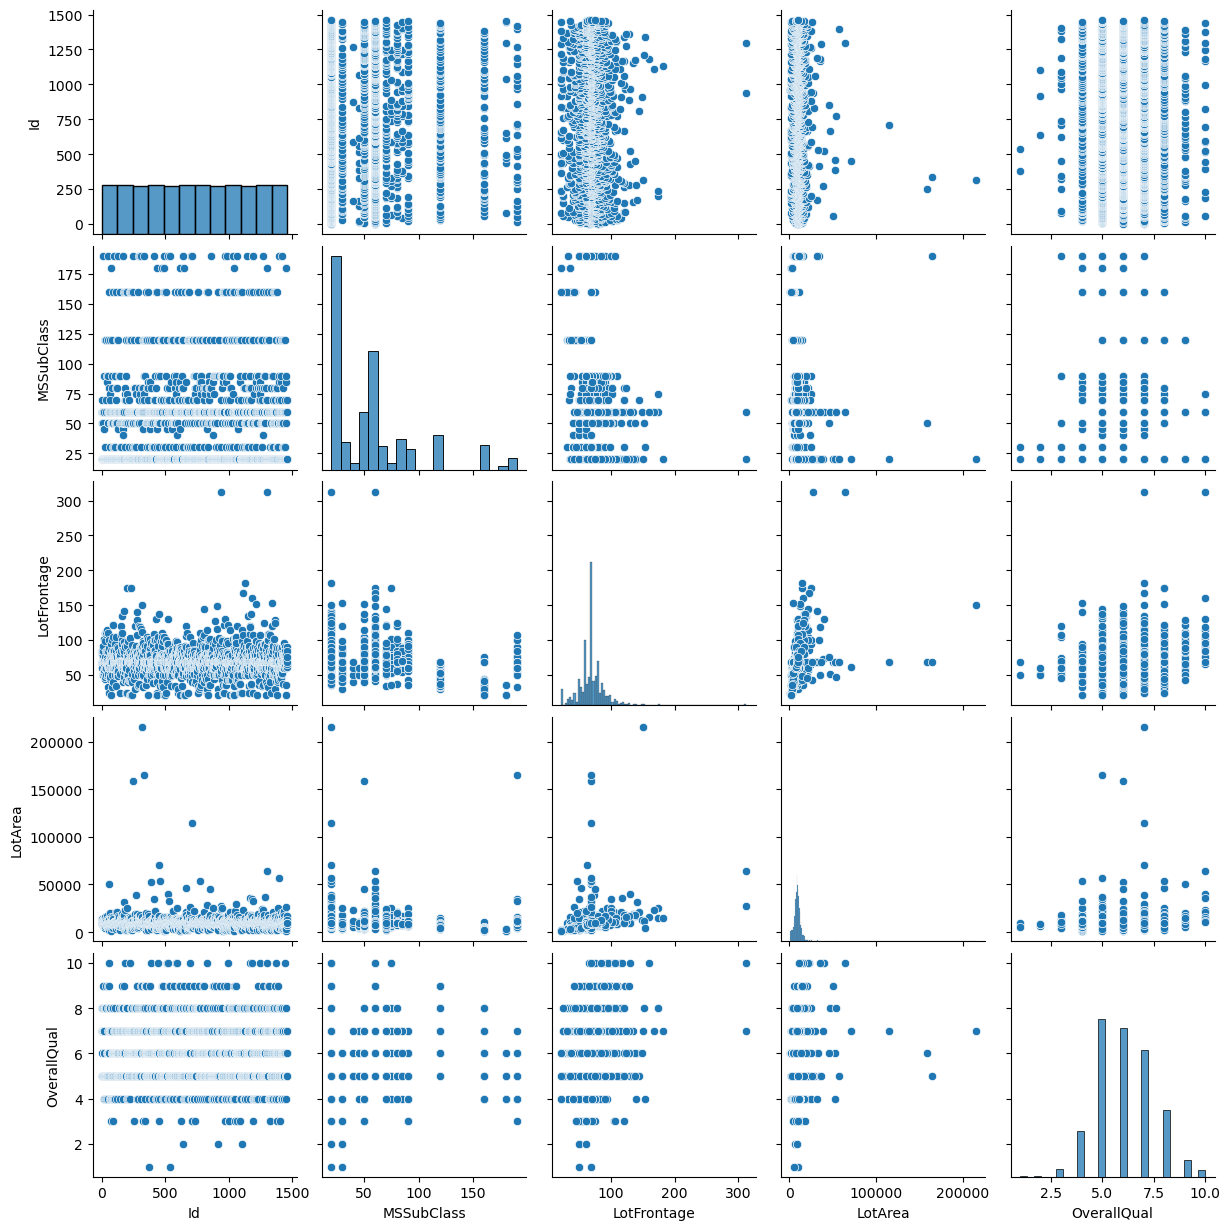

In [12]:
# 8. Visualizations

# Distribution of target
sns.histplot(train['SalePrice'], kde=True)
plt.title('SalePrice Distribution')
plt.show()

# Boxplot for outliers
sns.boxplot(x=train['SalePrice'])
plt.title('SalePrice Boxplot')
plt.show()

# Heatmap for correlation
plt.figure(figsize=(12,10))
corr = train.corr()
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with SalePrice')
plt.show()

# Pairplot of important numerical features with SalePrice
top_corr_features = corr.index[0:5]
sns.pairplot(train[top_corr_features])
plt.show()

In [13]:
# 9. Final dataset shape
print("Final shape:", train.shape)

Final shape: (1460, 248)
